<a href="https://colab.research.google.com/github/Sonhoangvo/csgo/blob/main/csgoVNAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv('csgo.csv',header = 0)

In [3]:
#Check and choose the features
data.drop(['day','month','year','date','wait_time_s','match_time_s'],axis = 1, inplace = True)


In [4]:
#Create a column for total rounds and drop team_a_rounds, team_b_rounds
data['total_rounds'] = data['team_a_rounds']
data.drop(['team_a_rounds','team_b_rounds'],axis = 1,inplace = True)

In [5]:
#Sastictics
print(data.head(n=10))
print(data.dtypes)
print(data.describe())

       map   ping  kills  assists  deaths  mvps  hs_percent  points result  \
0   Mirage  215.0   17.0      2.0    21.0   2.0         5.0    45.0    Win   
1   Mirage  199.0   13.0      4.0    24.0   2.0         0.0    40.0   Lost   
2   Mirage   85.0   15.0      3.0    18.0   3.0        26.0    37.0    Win   
3   Mirage   93.0   12.0      2.0    15.0   2.0        16.0    30.0   Lost   
4   Mirage   94.0   33.0      5.0    20.0   5.0        30.0    83.0    Tie   
5   Mirage   88.0   13.0      2.0    17.0   1.0        38.0    34.0   Lost   
6  Dust II   89.0   19.0      5.0    24.0   2.0        15.0    52.0   Lost   
7   Mirage   82.0   17.0      1.0    25.0   0.0        35.0    37.0   Lost   
8   Mirage  112.0   25.0     10.0    12.0   4.0        16.0    70.0    Win   
9   Mirage   89.0   13.0      1.0    17.0   0.0        61.0    31.0   Lost   

   total_rounds  
0          16.0  
1          16.0  
2          16.0  
3          11.0  
4          15.0  
5          16.0  
6          16.0

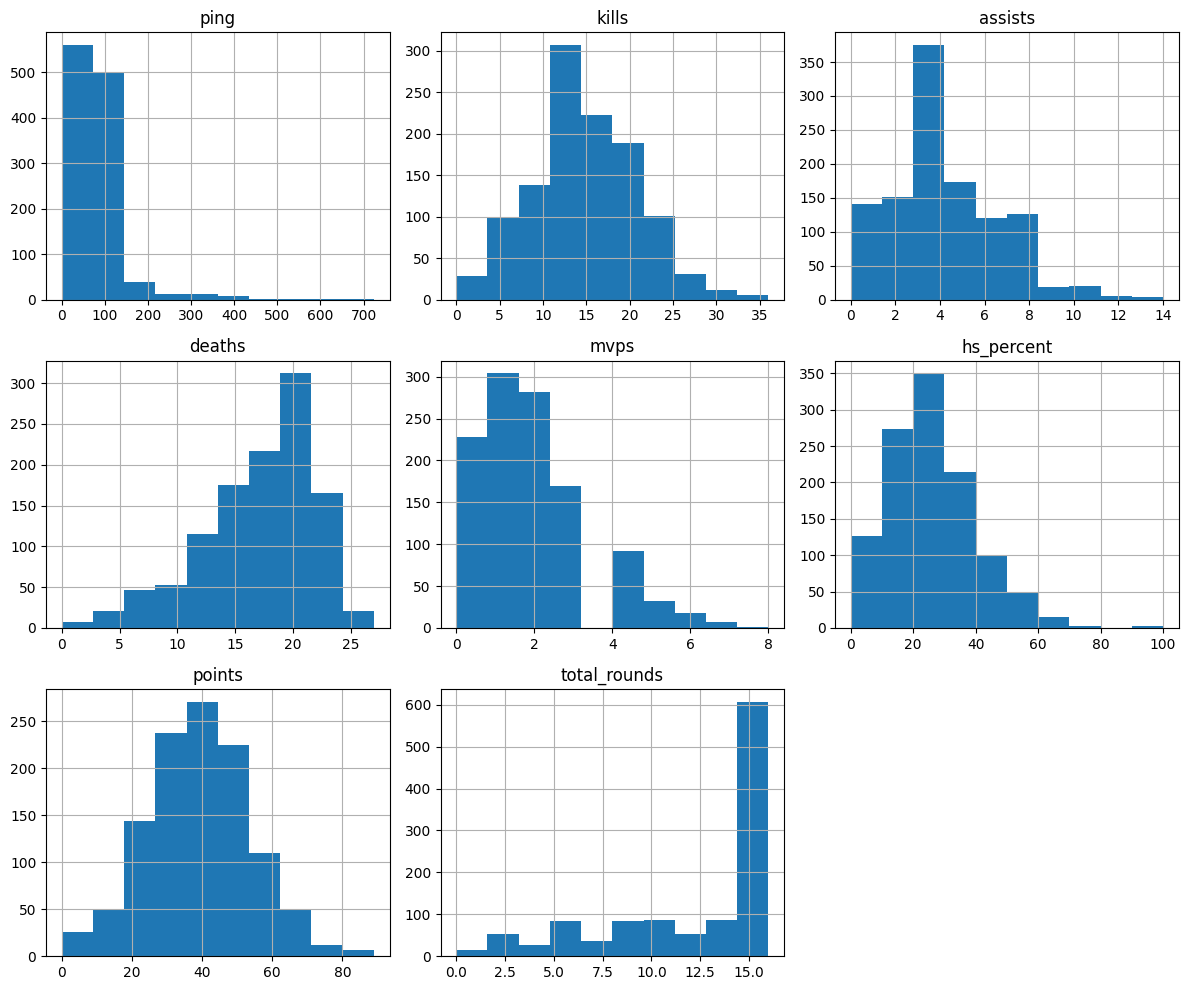

In [6]:
#Data visualization
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


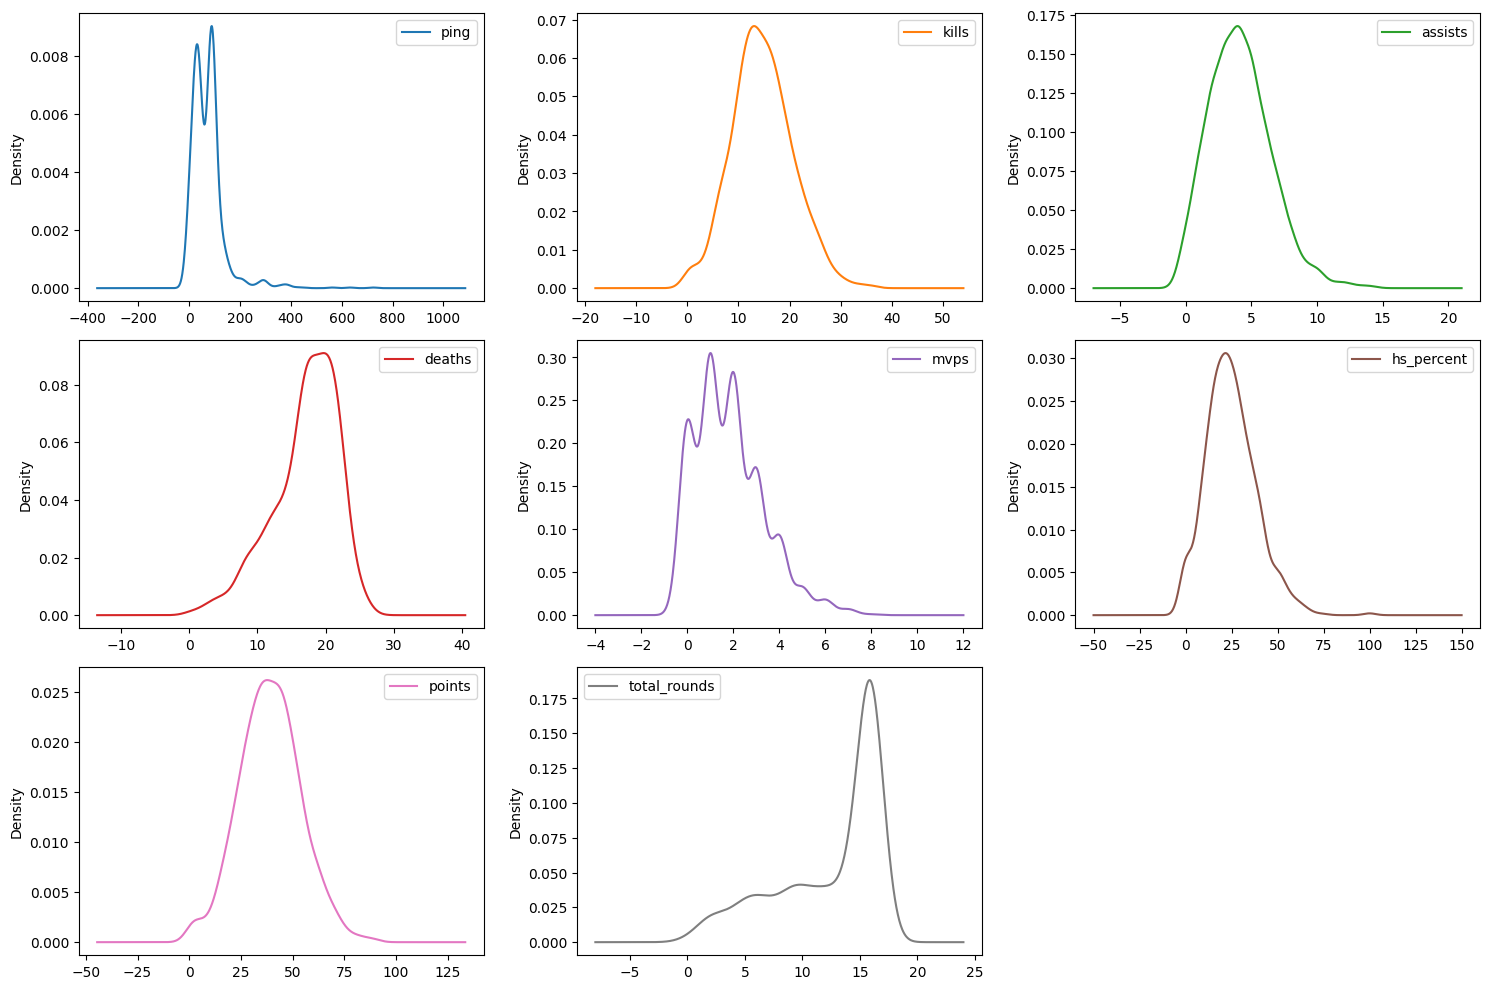

In [7]:
data.plot(kind='density', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

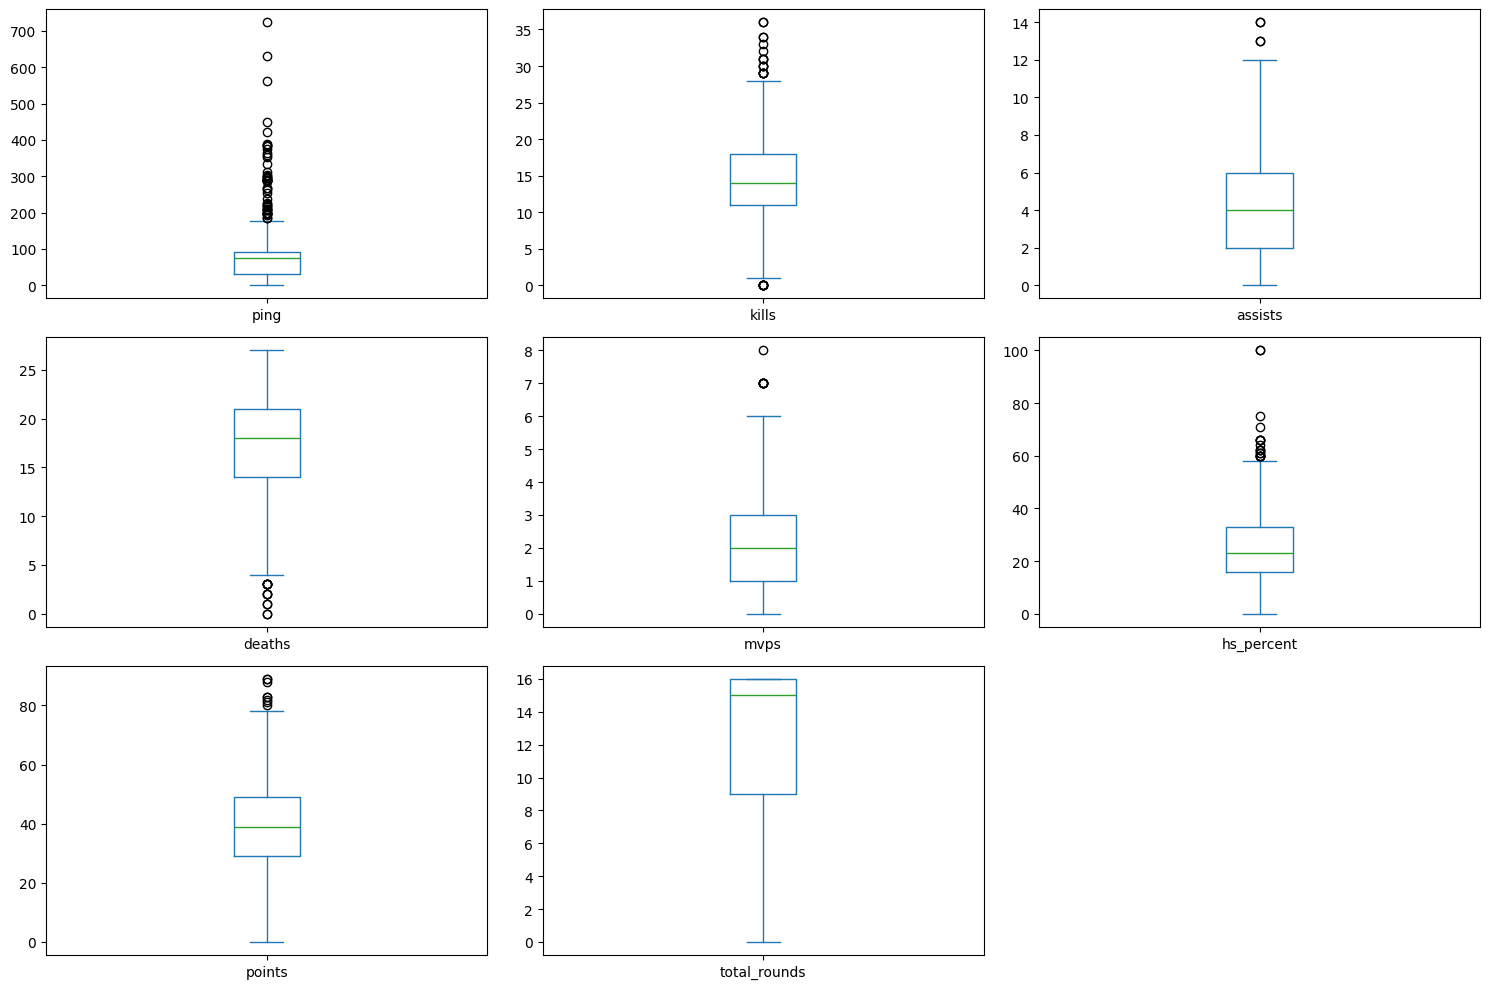

In [8]:
data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

In [9]:
#Preproccess the string data
data['map'].replace({
    'Mirage' : 0,
    'Dust II' : 1,
    'Cache' : 2,
    'Overpass' : 3,
    'Cobblestone' : 4,
    'Inferno' : 5,
    'Austria' : 6,
    'Canals' : 7,
    'Nuke' : 8,
    'Italy' : 9
},inplace = True)

data['result'].replace({
    'Win' : 1,
    'Lost' : 0,
    'Tie' : 2
},inplace = True)

/tmp/ipython-input-9-3387599915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['map'].replace({
/tmp/ipython-input-9-3387599915.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['map'].replace({
/tmp/ipython-input-9-3387599915.py:15: FutureWarning: A value is trying to be set on a c

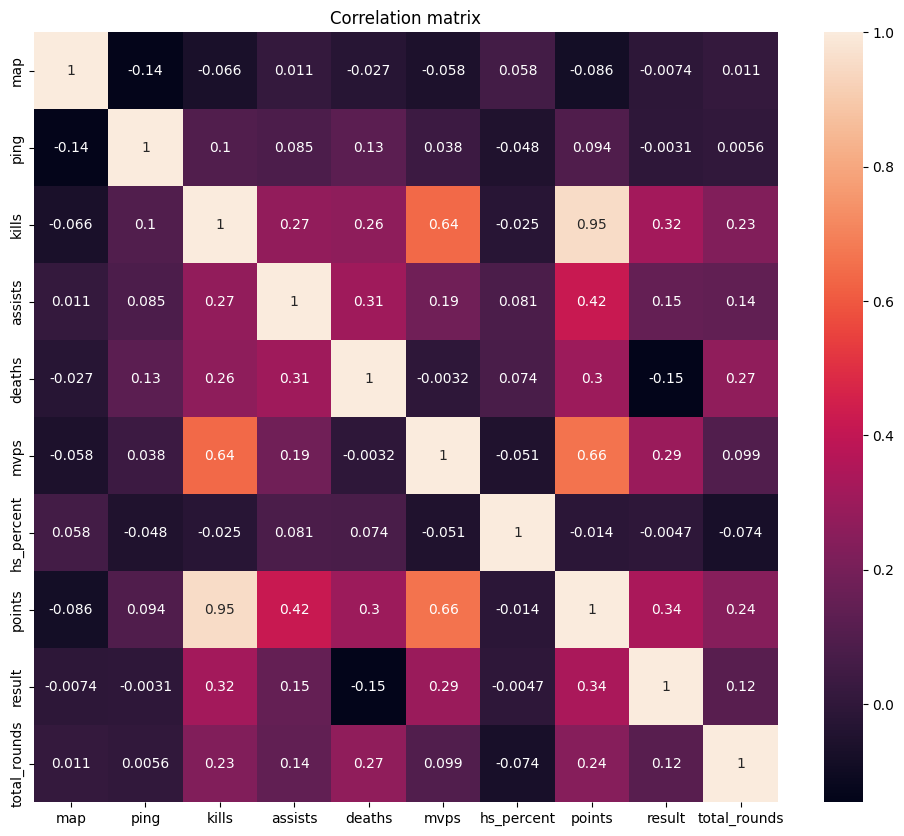

In [10]:
#plot correlation matrix
correlation = data.corr()
plt.figure(figsize = (12,10))
sns.heatmap(correlation,annot = True)
plt.title('Correlation matrix')
plt.show()

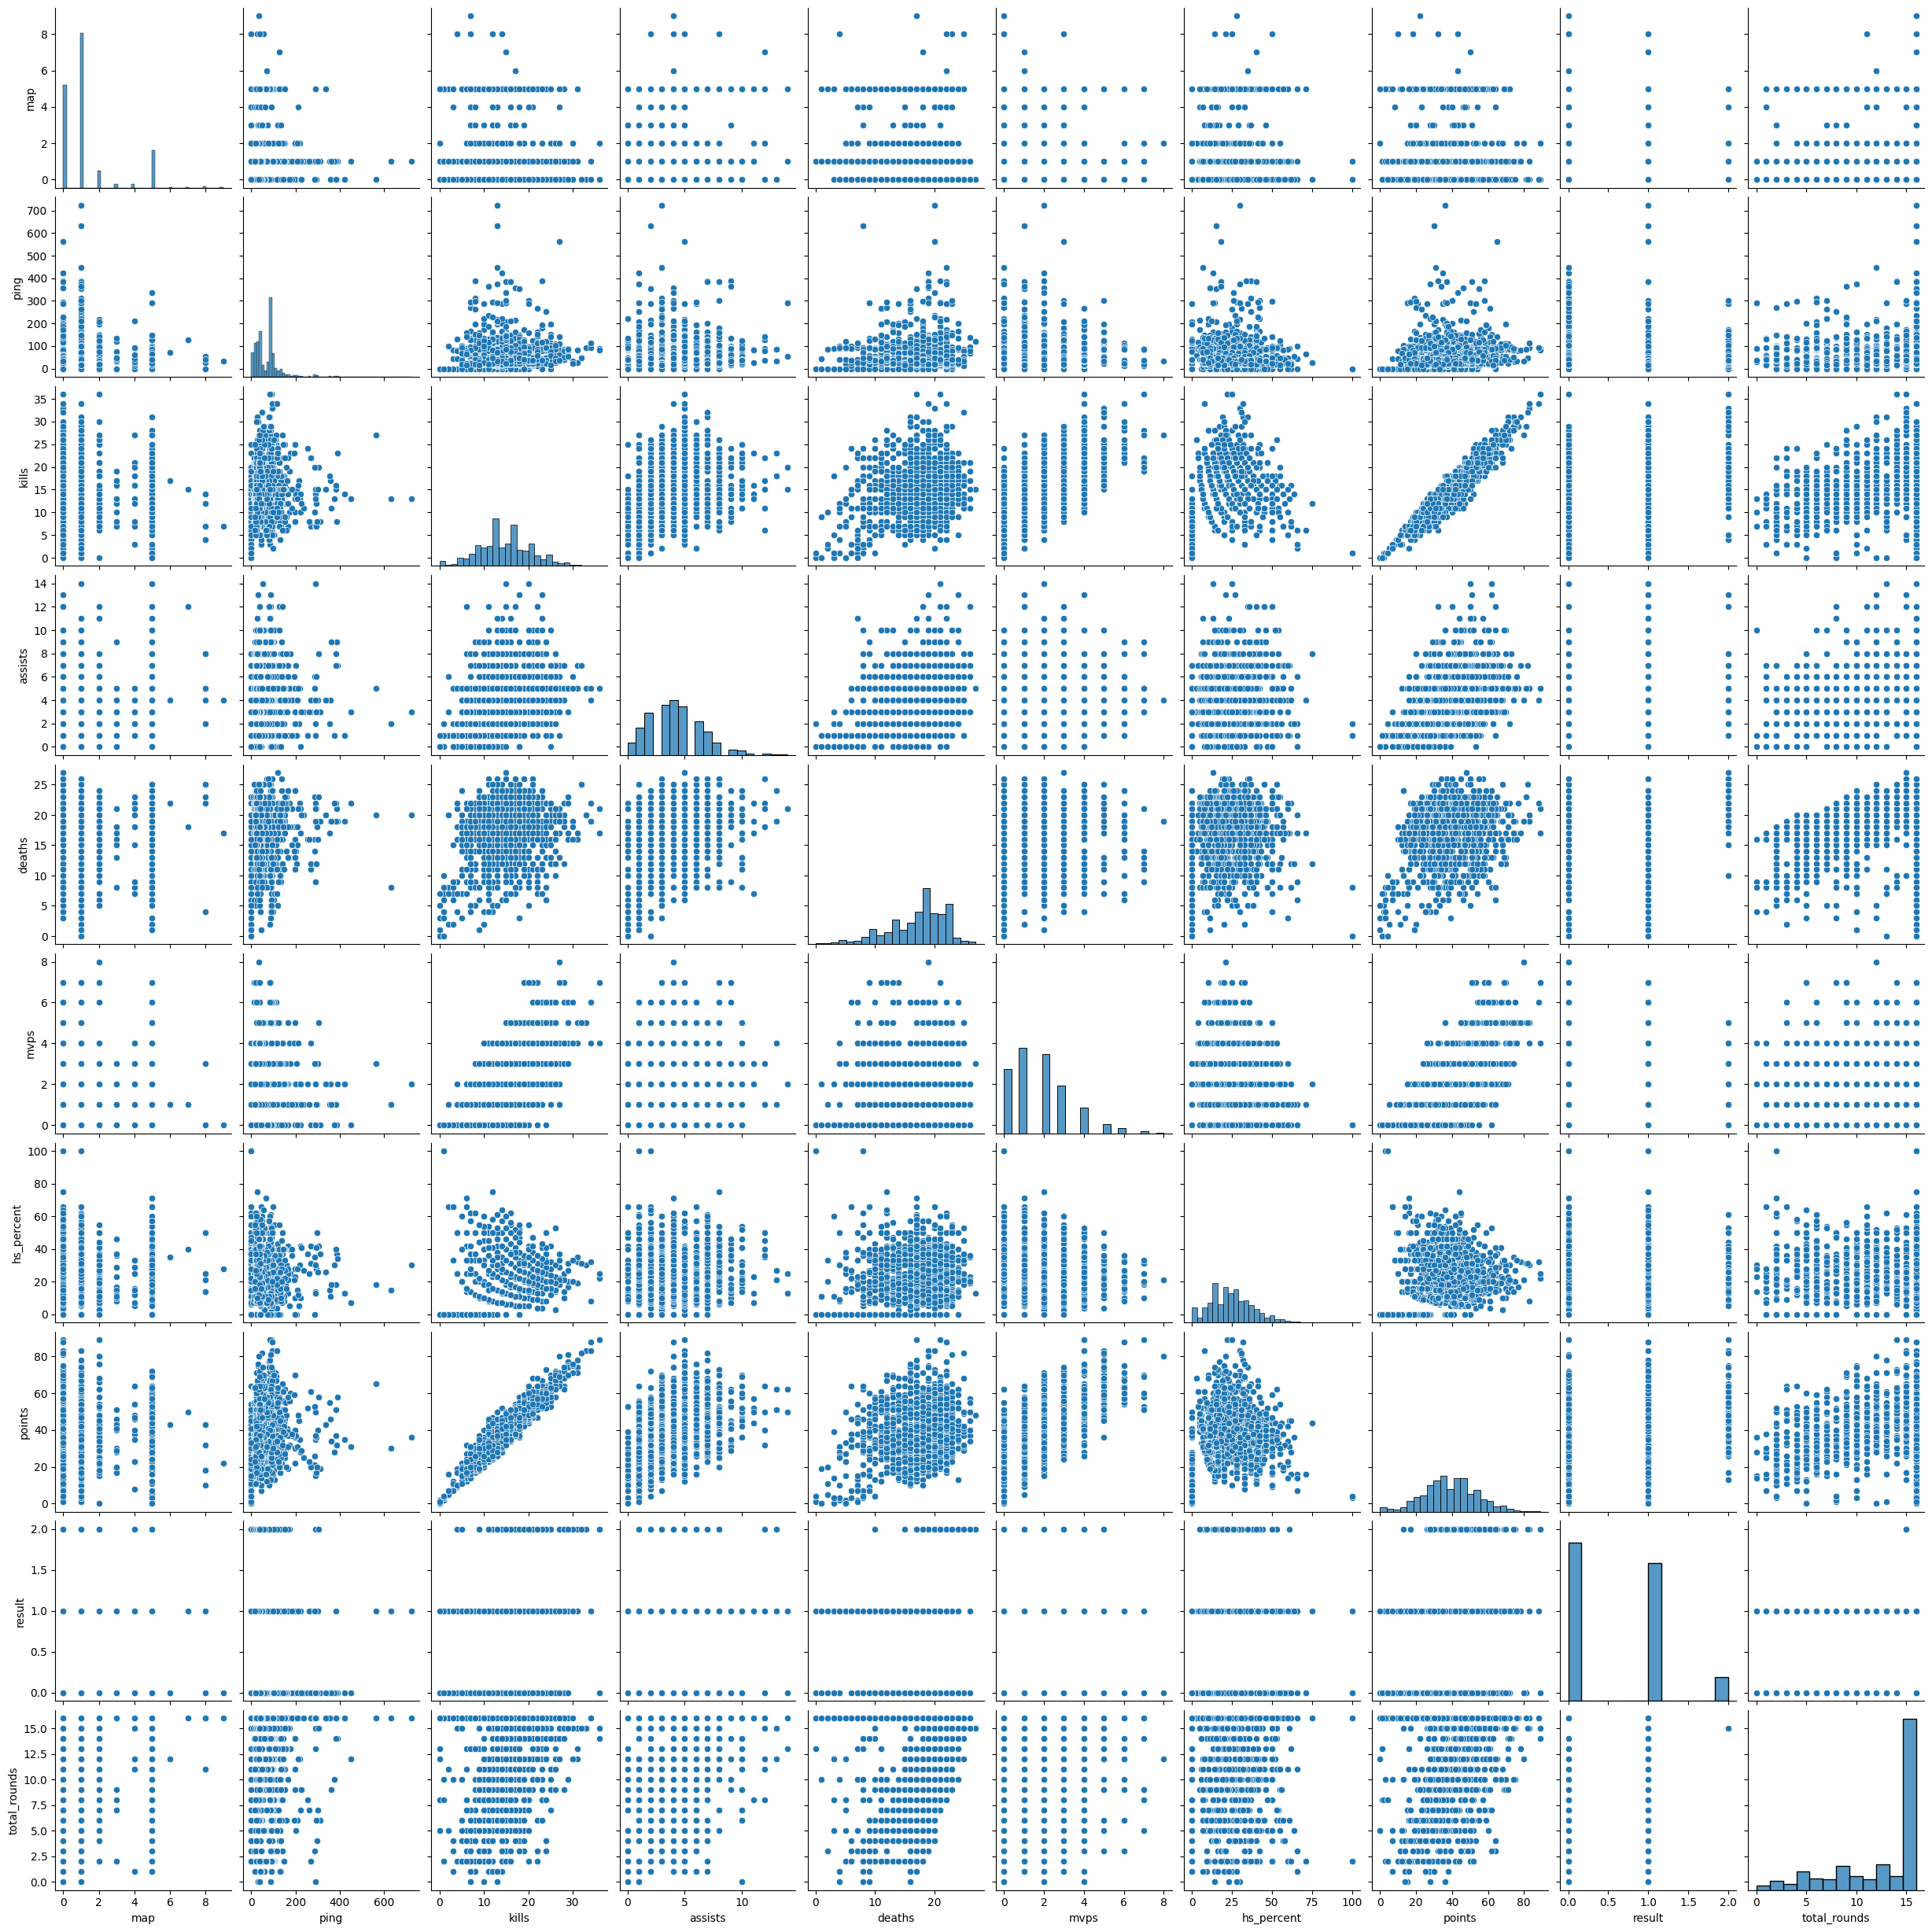

In [11]:
#plot scatter plot
sns.pairplot(data)
plt.show()

In [12]:
#Scale, split and rebalance the data
x = data.drop('result',axis = 1)
y = data['result']
scale = RobustScaler()
x = scale.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [13]:
#Fit and predict the testing set
model = SVC()
model.fit(x_resampled,y_resampled)
predict = model.predict(x_test)


In [14]:
#Print out classification report

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.74      0.51      0.61       105
           1       0.75      0.73      0.74       101
           2       0.29      0.76      0.42        21

    accuracy                           0.63       227
   macro avg       0.59      0.67      0.59       227
weighted avg       0.70      0.63      0.65       227



In [18]:
#Test out multiple parameters for the model
parameters = {
    'kernel':('linear', 'rbf','poly','sigmoid'),
    'C':list(range(1,11)),
    'gamma' : ('scale','auto'),
    }
clf = GridSearchCV(model,parameters, cv = 5, scoring = 'precision_weighted',verbose = 2)
clf.fit(x_resampled,y_resampled)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ......................C=1, gamma=scale

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='precision_weighted', verbose=2)

In [19]:
print(clf.best_params_)


{'C': 7, 'gamma': 'auto', 'kernel': 'rbf'}


In [20]:
print(classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62       105
           1       0.75      0.73      0.74       101
           2       0.29      0.62      0.39        21

    accuracy                           0.64       227
   macro avg       0.58      0.63      0.58       227
weighted avg       0.68      0.64      0.65       227

